# Task 1

In [25]:
import numpy as np
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
import random
from scipy import sparse

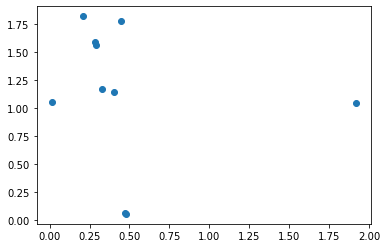

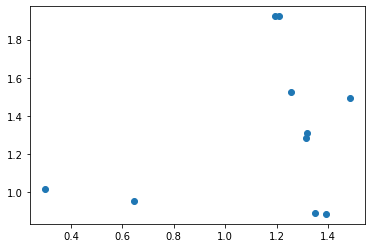

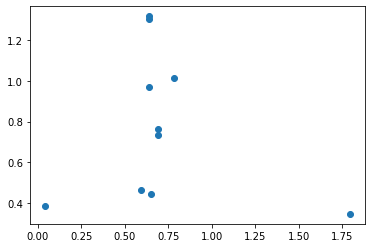

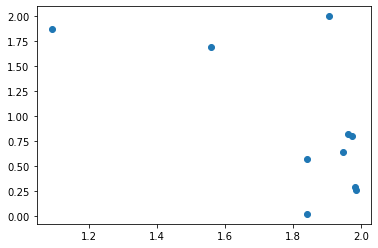

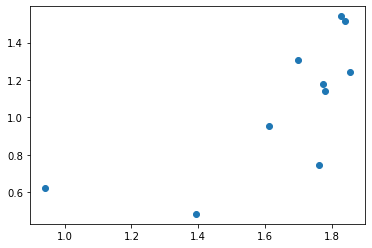

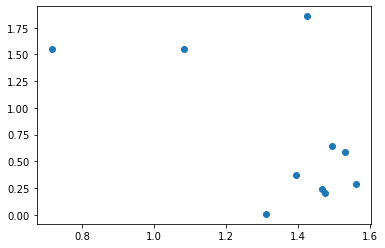

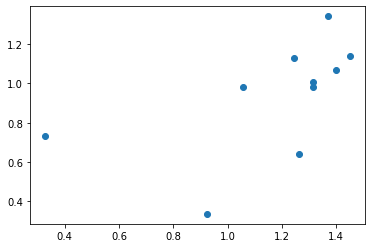

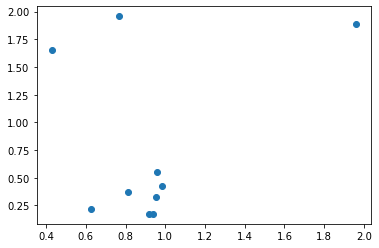

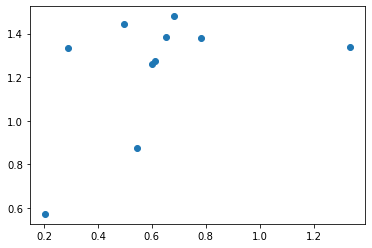

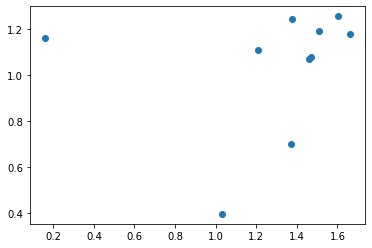

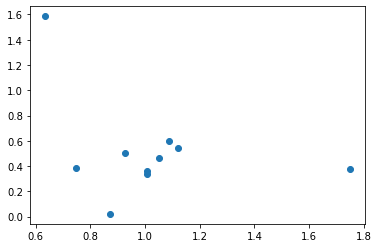

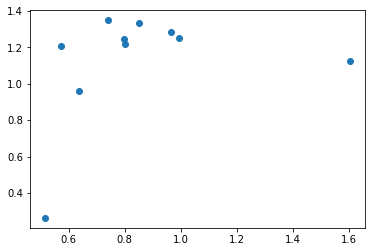

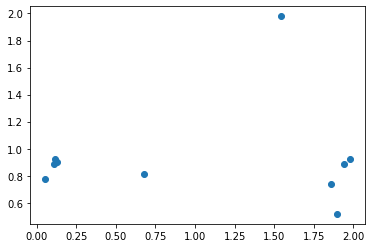

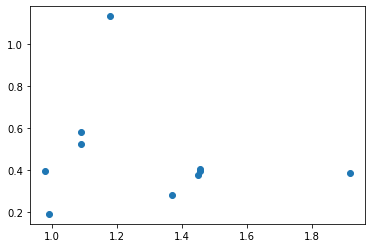

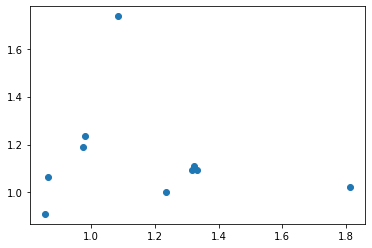

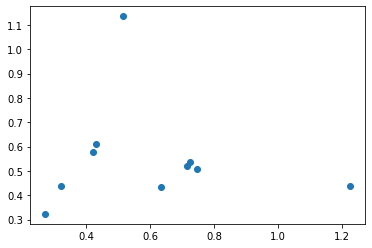

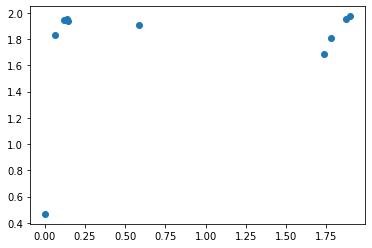

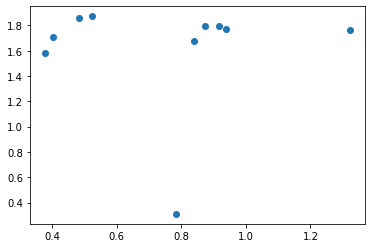

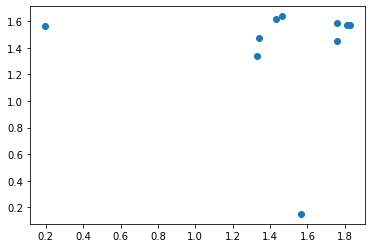

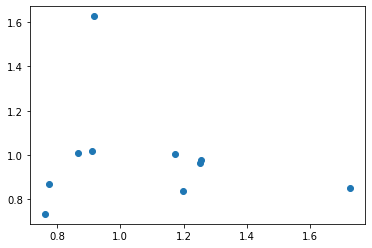

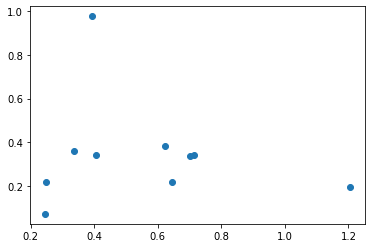

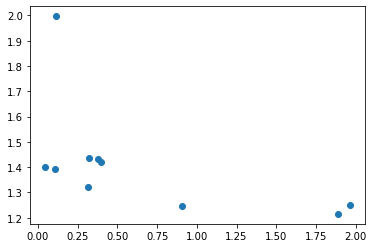

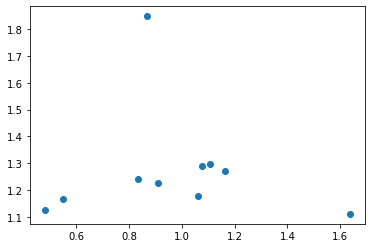

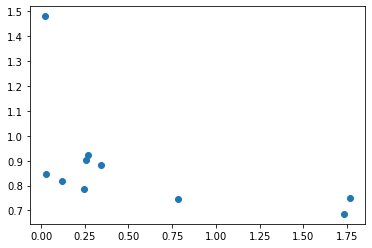

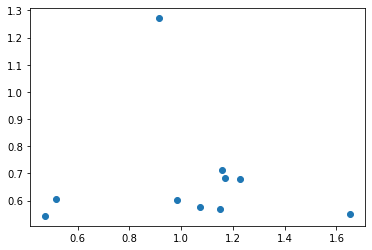

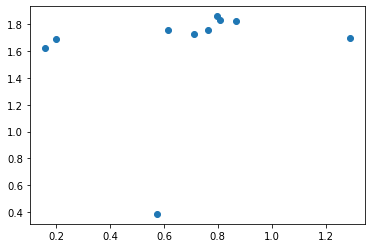

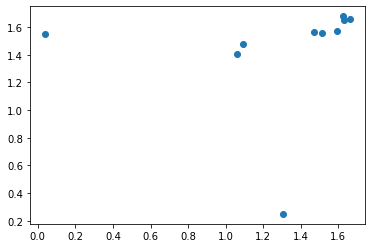

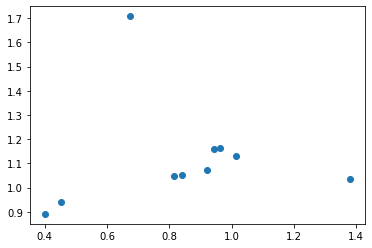

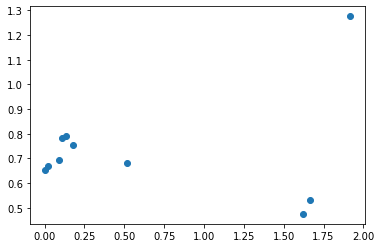

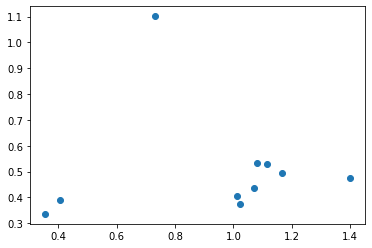

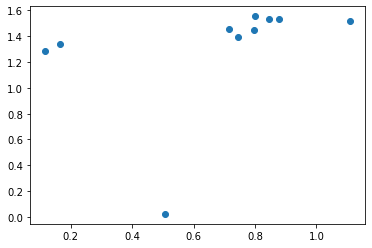

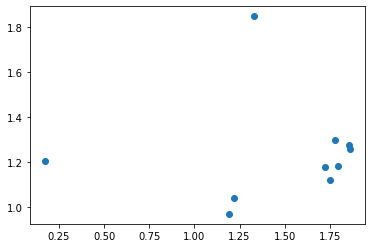

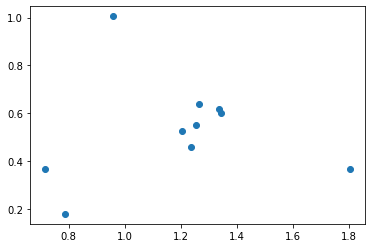

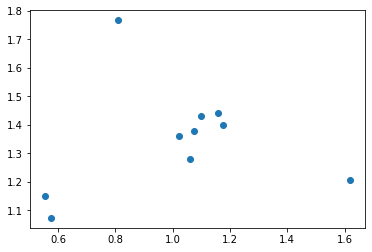

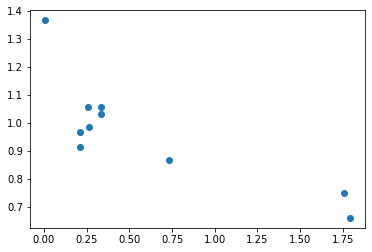

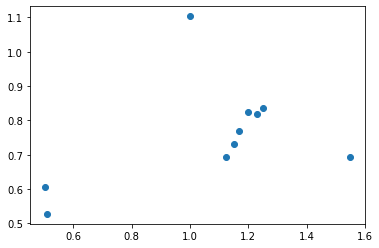

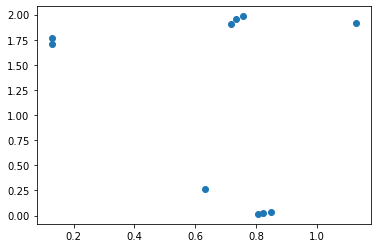

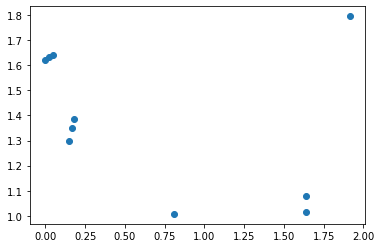

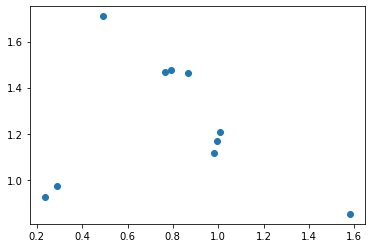

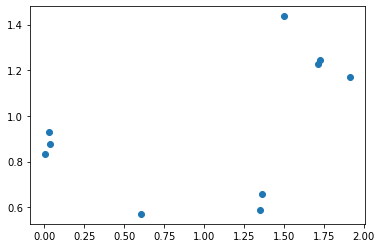

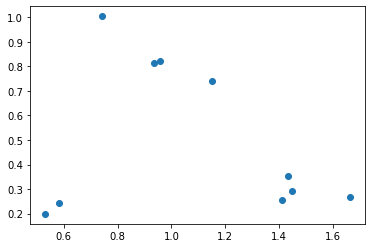

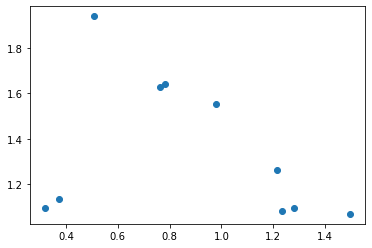

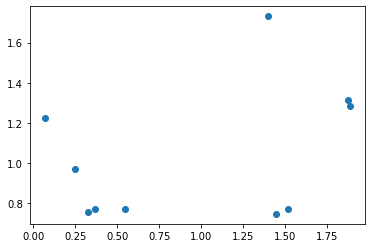

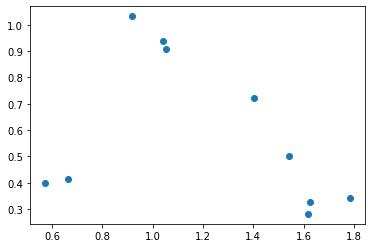

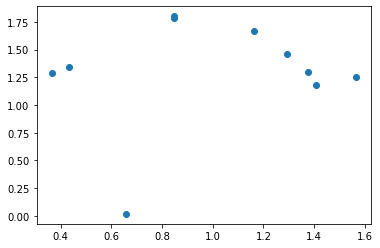

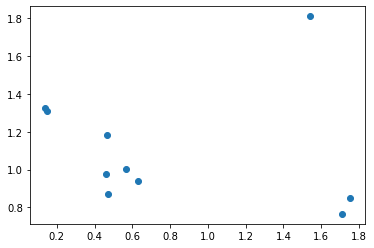

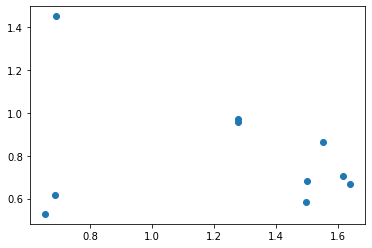

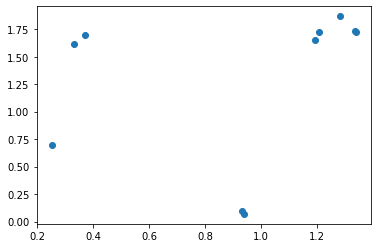

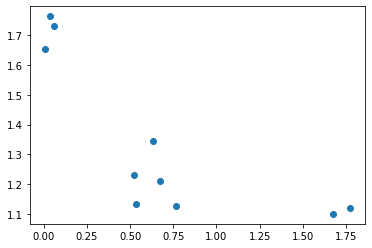

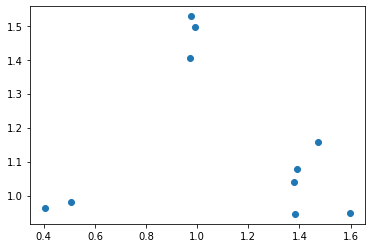

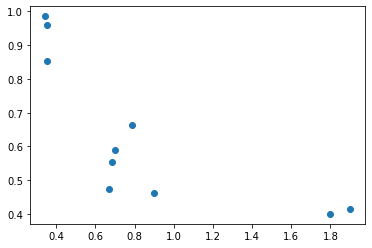

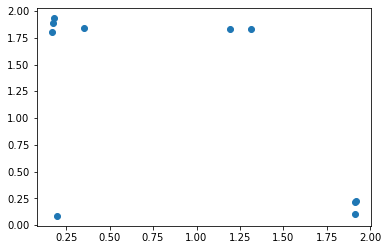

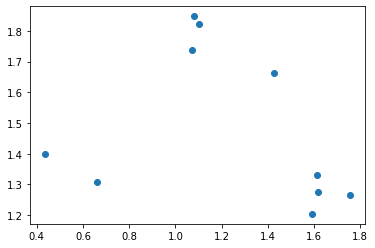

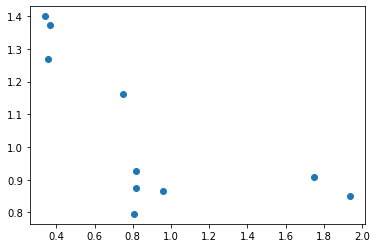

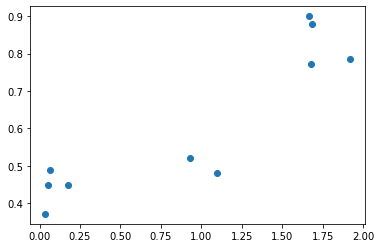

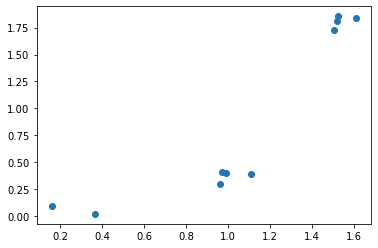

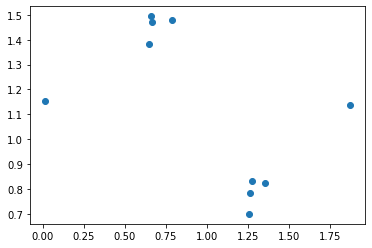

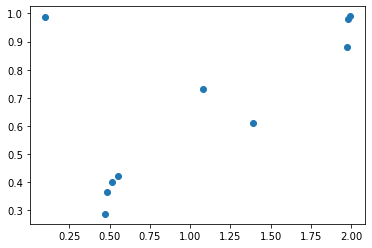

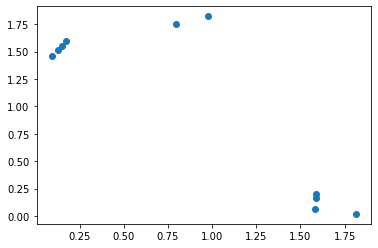

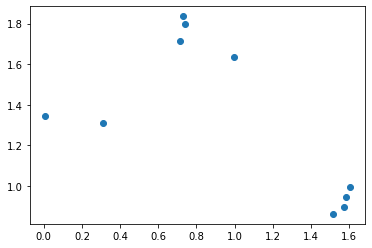

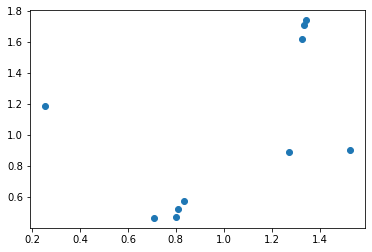

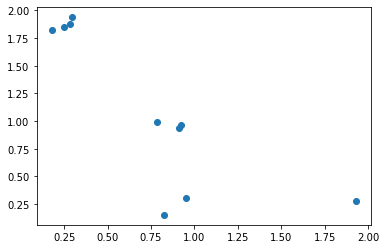

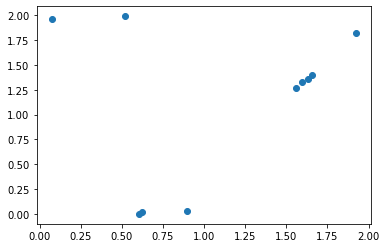

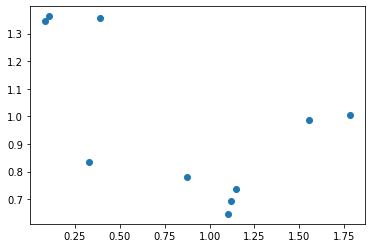

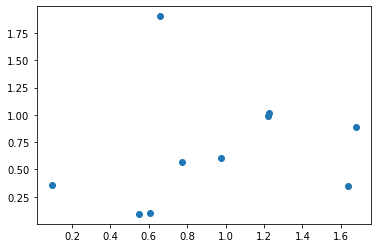

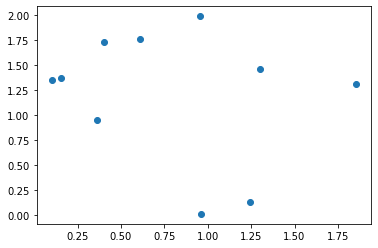

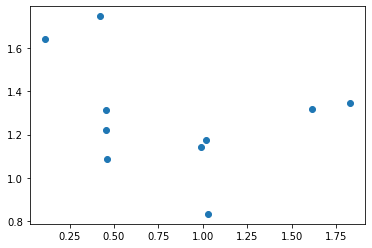

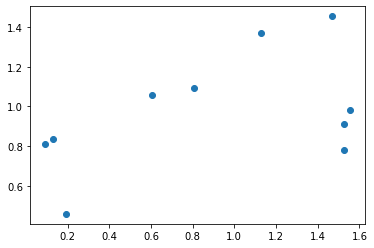

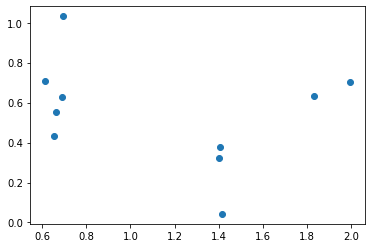

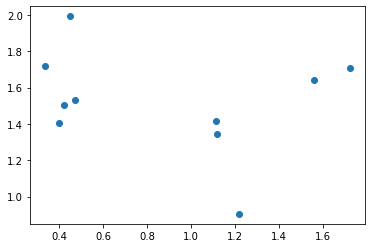

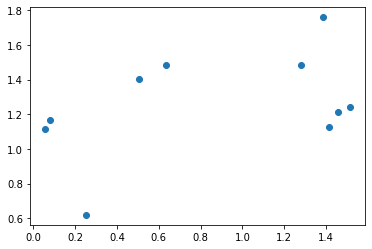

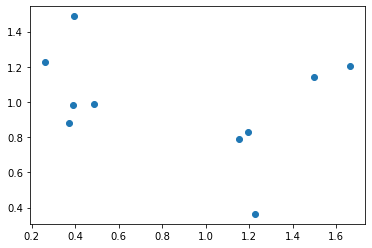

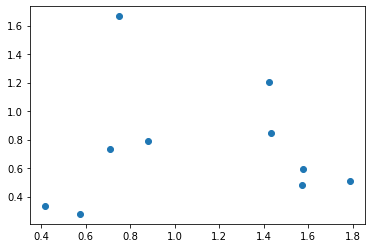

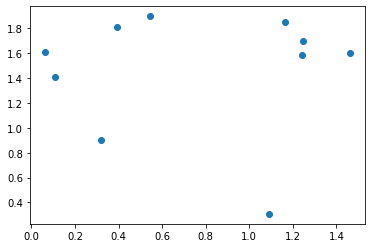

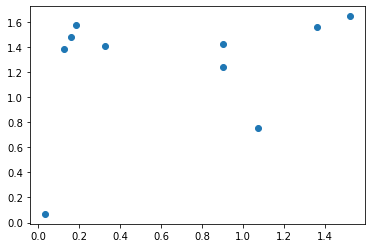

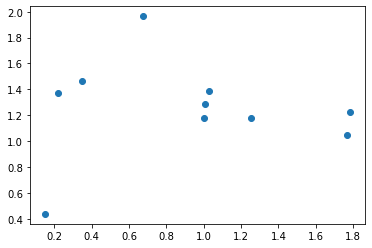

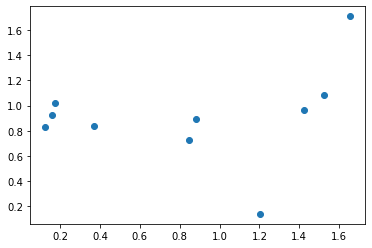

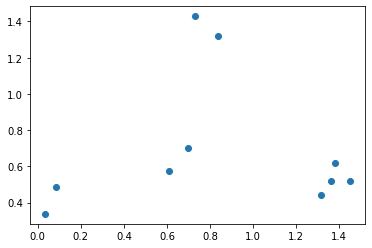

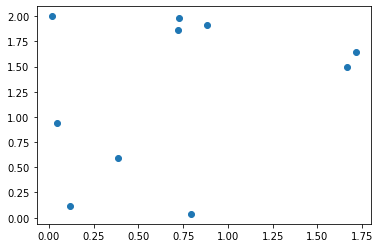

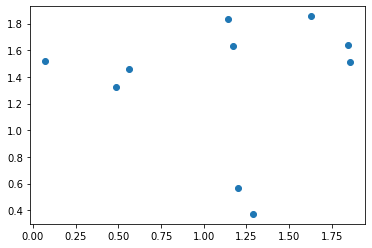

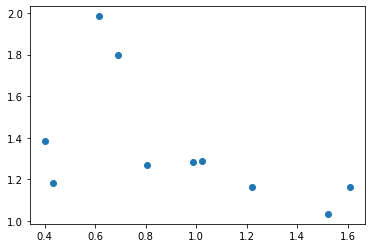

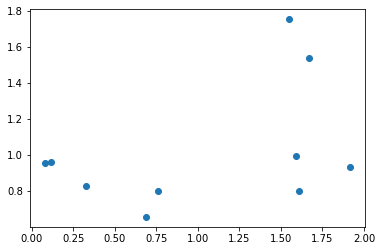

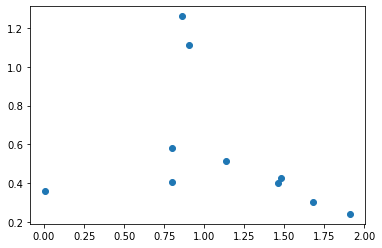

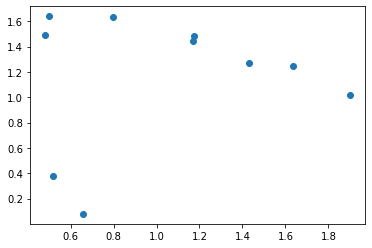

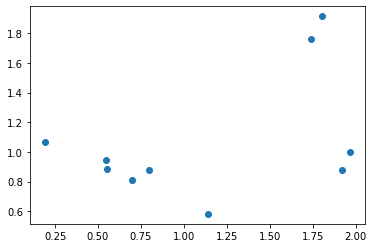

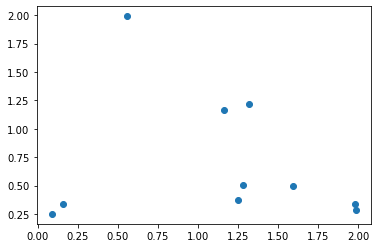

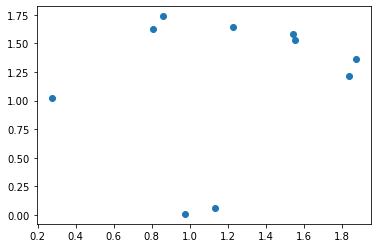

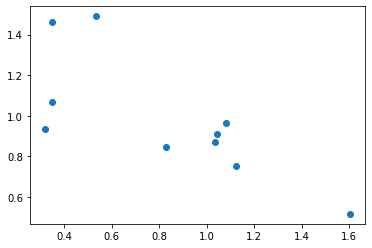

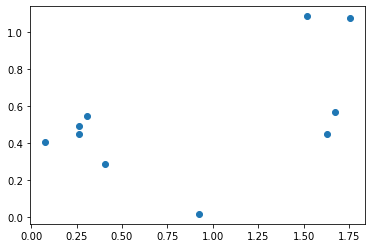

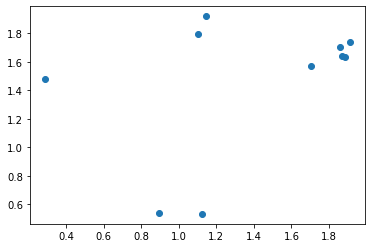

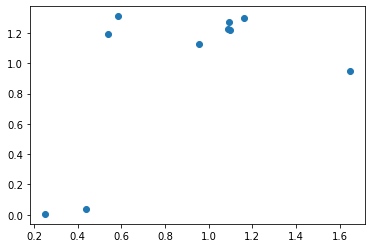

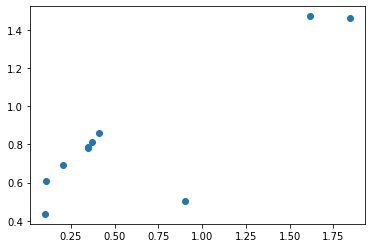

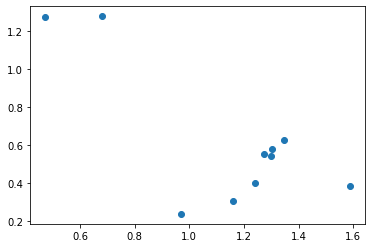

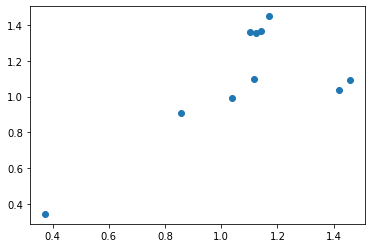

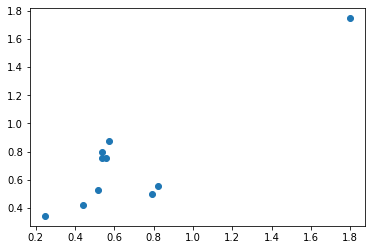

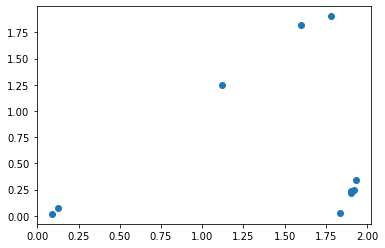

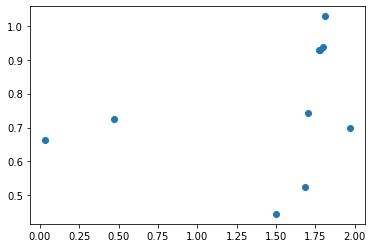

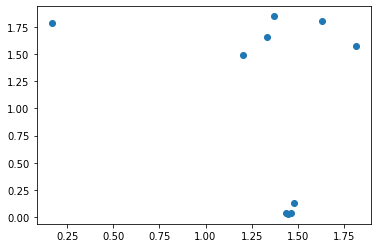

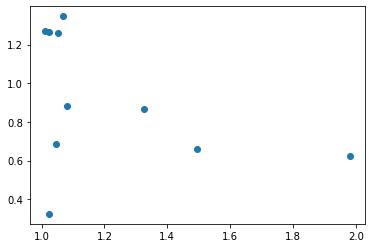

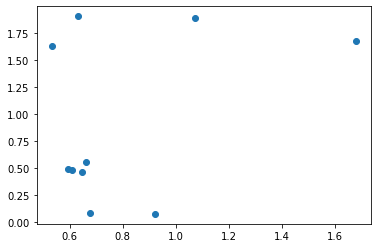

In [26]:
# initializing our birds positions
def initialize_birds(L, N):
    x_positons = np.random.uniform(0, L - 1, N)
    y_positons = np.random.uniform(0, L - 1, N) 

    combined = np.vstack((x_positons, y_positons)).T
    return combined


# we have to make a 2d vector of velocities
def initialize_velocities(positions, v_0):

    xes = positions[0:, 0:1]
    yes = positions[0:, 1:] * 1j
    z = xes + yes

    angles = np.angle(z)
    vx = v_0 * np.cos(angles)
    vy = v_0 * np.sin(angles)    

    combined = np.column_stack((vx, vy))
    return combined


# calculating angles of birds vs horiontal line
def calc_angles(positions):

    xes = positions[0:, 0:1]
    yes = positions[0:, 1:] * 1j
    z = xes + yes

    angles = np.angle(z)
    return angles


# add noise in radians
def add_noise(noise_val_degrees, number):
    noise = np.random.uniform(-noise_val_degrees, noise_val_degrees, number)
    noise_radians = np.radians(noise)

    return noise_radians


def find_nearest_neighbors(positons):
    pass


def new_direction(direction):
    pass


def new_velocity(velocity):
    pass

# Initialization parameters


L = 2
N = 10
r = 1
r_b = 4
v_0 = 2
a = 0.15

t_steps = 100

#  Here we initialize our birds postions and velocities
positions = initialize_birds(L, N)
velocities = initialize_velocities(positions, v_0)
angles = calc_angles(positions)

x_pos = positions[0:, 0:1]
y_pos = positions[0:, 1:]

for t in range(t_steps):
    # Creation of birds tree
    angles = calc_angles(positions) 
    birds_tree = cKDTree(positions, boxsize=[L,L])
    dist = birds_tree.sparse_distance_matrix(birds_tree,max_distance=r,output_type='coo_matrix') # format wyniku (ptak i, ptak j, dystans)

    dist_copy = dist.copy()
    dist_copy_dense = dist_copy.todense()
    dist_no_zero = dist_copy_dense != 0
    dist_copy_dense[dist_no_zero] = 1

    exp_angles_vec = np.exp(1j * angles)
    sum_average_direction = np.dot(dist_copy_dense, exp_angles_vec)
    noise = add_noise(5, N)
    noise_matrix = np.asmatrix(noise).T
    new_angles = np.angle(sum_average_direction) + a * noise_matrix

    new_x = positions[0:, 0:1] + v_0 * np.cos(new_angles) #
    new_y = positions[0:, 1:] + v_0 * np.sin(new_angles)   

    # boundary conditions
    new_x = np.where(new_x < L, new_x, new_x - L)
    new_x = np.where(new_x > 0, new_x, new_x + L)

    new_y = np.where(new_y < L, new_y, new_y - L)
    new_y = np.where(new_y > 0, new_y, new_y + L)

    positions[0:, 0:1] = new_x
    positions[0:, 1:] = new_y

    plt.scatter(np.asarray(positions[0:, 0:1]), np.asarray(positions[0:, 1:]))
    plt.show()


 dist is a sparse matrix where distances beetween birds calculated, output format is (bird_i, bird_j, distance)

#orient = np.random.uniform(-np.pi, np.pi, size=N)
#data = np.exp(orient[dist.col]*1j)
#neigh = sparse.coo_matrix(data, (dist.row(), dist.col()), shape = dist.get_shape()) # macierz do ktorej od razu wstawiamy w miejsca niezerowe macierzy exponenty
 trzeba policzyc elementy niezerowe od ptakow -> uzyskamy info ile ptakow
 w miejsca niezerowe macierzy dist trzeba zrobic exp(ithetai) gdzie theta_i to jest kąt między vektorem prędkości ptaka a poziomem

## Test with calculating angles
This will be needed to properly update velocities of birds

In [27]:
positions = initialize_birds(L, N)
#print(positions)
xes = positions[0:, 0:1]
yes = positions[0:, 1:] * 1j
z = xes + yes

angles = np.angle(z)
vx = v_0 * np.cos(angles)
vy = v_0 * np.sin(angles)

vel = np.column_stack((vx, vy)) # problem with velocity solved
#print(angles)

noise = np.random.uniform(-5, 5, 5)
noise

array([ 0.48920368, -3.30386947, -0.37956733, -3.24107548, -2.94825887])

## Fun with sparse matrices

In [28]:
import numpy as np
from scipy.sparse import csr_matrix

# create a 2-D representation of the matrix
A = np.array([[1, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 1],\
 [0, 0, 0, 2, 0, 0]])
print("Dense matrix representation: \n", A)

# convert to sparse matrix representation 
S = csr_matrix(A)
print("Sparse matrix: \n",S)

# convert back to 2-D representation of the matrix
B = S.todense()
print("Dense matrix: \n", B)

g = B > 0
print(g)    # Here i can input numbers in nonzero indices 
B[g] = 8
print(B)

# thats good news, we succesfuly inputed numbers to sparse matrix 

test = dist.todense()
dist_numb = test != 0
test[dist_numb] = 1
#print(test)
new = csr_matrix(test)
nonzero_indices = new.nonzero()

print(type(nonzero_indices))

Dense matrix representation: 
 [[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
Sparse matrix: 
   (0, 0)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
Dense matrix: 
 [[1 0 0 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
[[ True False False False False False]
 [False False  True False False  True]
 [False False False  True False False]]
[[8 0 0 0 0 0]
 [0 0 8 0 0 8]
 [0 0 0 8 0 0]]
<class 'tuple'>


## Angles done correctly

In [29]:
exponential_angles = np.exp(1j * angles)
exponential_angles_real_part = np.real(exponential_angles)
exponential_angles_imag_part = np.imag(exponential_angles)
#print(exponential_angles)
#print(exponential_angles_real_part)
#print(exponential_angles_imag_part)

a = 0.3 + 1j * 0.2
b = 0.4 + 1j * 0.1

a_angle = np.angle(a, True)
b_angle = np.angle(b, True)

c = a + b
d = np.angle(c)
d_angle = np.angle(c, True)
print(a_angle)
print(b_angle)
print(d_angle)

33.69006752597979
14.036243467926479
23.198590513648192


In [30]:
a = np.arange(10)
print(a)
a = np.where(a > 5, a , a -3 )
print(a)


[0 1 2 3 4 5 6 7 8 9]
[-3 -2 -1  0  1  2  6  7  8  9]
